# Lista_4a
#### Lucas Alves Fidelis Araújo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### QUESTÃO 1: 

In [2]:
import numpy as np

def bissecao(a,b,f,tol):
    i = 0
    if((np.sign(f(a)) * np.sign(f(b))) != -1):
        return "Não existe raiz"
    elif((np.sign(f(a)) * np.sign(f(b))) == -1):
        while True:
            m = (a + b)/2
            if(np.abs(f(m)) < tol):
                break
            else:
                if((np.sign(f(a)) * np.sign(f(m))) == -1):
                    b = m
                else:
                    a = m
    return m
    i = i+1

In [3]:
def f(x):
    return np.exp(-x)+0.5
def f1(x):
    return np.cos(x)
def g(x):
    return f(x)-f1(x)
bissecao(-1,7,g,0.0001)

5.2421875

### QUESTÃO 2: 

In [4]:
def f(x):
    return -0.5*x**2+2.5*x+4.5

### A)

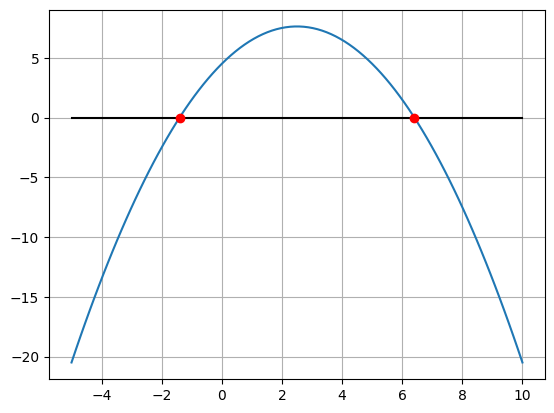

In [5]:
x = np.linspace(-5, 10, 100)
k = np.arange(-5, 0)
plt.plot([-5,10],[0,0],'black')
plt.plot(x,f(x),[bissecao(-2,0,f,0.0001),bissecao(6,7,f,0.0001)],[0,0],'ro')
plt.grid()

### B)

In [6]:
coeficientes = [-0.5,2.5,4.5]
np.roots(coeficientes)

array([ 6.40512484, -1.40512484])

### C)

In [7]:
def bissecaoInteracao(a,b,f,inte = 200):
    erro, m_ant = 1, a
    cont = 0
    if((np.sign(f(a)) * np.sign(f(b))) != -1):
        return "Não existe raiz"
    elif((np.sign(f(a)) * np.sign(f(b))) == -1):
        while(cont < inte):
            m = (a + b)/2
            if(np.abs(f(m)) < 0.0001):
                break
                print('A raíz é ', m)   
                print("Erro relativo = ",np.abs((m - m_ant)/m),"Valor da interação = ",m)#erro relativo obtido entre cada iteração
                return m,np.abs((m - m_ant)/m)
            else:
                if((np.sign(f(a)) * np.sign(f(m))) == -1):
                    b = m
                else:
                    a = m
            cont = cont+1
            erro = np.abs((m - m_ant)/m)
            m_ant = m
            print(cont,"º Erro relativo = ", erro,"\nValor da interação = ", m)#erro relativo obtido entre cada iteração
    return m

In [8]:
bissecaoInteracao(5,10,f,3)

1 º Erro relativo =  0.3333333333333333 
Valor da interação =  7.5
2 º Erro relativo =  0.2 
Valor da interação =  6.25
3 º Erro relativo =  0.09090909090909091 
Valor da interação =  6.875


6.875

Erro relativo da primeira interação com o resultado da letra b

In [9]:
erro1 = np.abs( 7.5-6.40512484)/ 7.5
erro1

0.14598335466666665

Erro relativo da segunda interação com o resultado da letra b.

In [10]:
erro2 = np.abs(6.25-6.40512484)/ 6.25
erro2

0.024819974400000007

Erro relativo da terceira interação com o resultado da letra b.

In [11]:
erro3 = np.abs((6.875-6.40512484)/6.875)
erro3

0.06834547781818182

### QUESTÃO 3: 

In [12]:
def f(x):
    return x**3
def g(x):
    return np.sin(x)

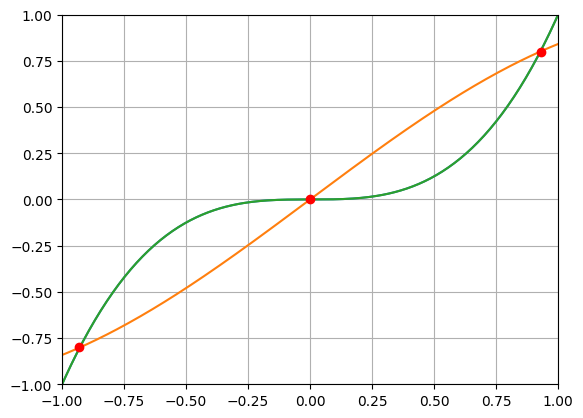

In [13]:
x = np.linspace(-5, 3, 1000)


plt.plot(x,f(x))
plt.plot(x,g(x))

plt.plot(x,f(x),[-0.93,0,0.93],[-0.80,0,0.80],'ro')

plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.grid()

In [14]:
def h(x):
    return g(x)-f(x)


bissecao(0.5,1,h,2e-2)

0.9375

### QUESTÃO 4: 

In [15]:
def f(x):
    return (-2*(x**6))-(1.5*(x**4))+(10*x)+20
def fi(x):
    return -12*x**5-6*x**3+10

In [16]:
bissecao(0,1,fi, 5e-2)

0.87109375

### QUESTÃO 5: 

In [17]:
def interpolacao(f, a, b, tol=1e-10):
    erro, x_ant = 1, a
    interacoes = 0
    while(erro > tol):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if inf*sup != -1: 
            print("Não há raiz nesse intervalo")
            return inf*sup
        else:
            x = a-((f(a)*(b-a))/(f(b)-f(a)))
            if f(x) == 0:
                
                print('A raíz é ', x)   
                return [x,interacoes]
            
            elif inf*np.sign(f(x)) == -1: b = x
            else: a = x
                
        erro = np.abs((x - x_ant)/x)
        x_ant = x
        interacoes+=1
        
    return [x,interacoes]

def bissecao3(f, a, b, tol=1e-10):
    erro, x_ant = 1, a
    interacoes=0
    while(erro > tol):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if inf*sup != -1: 
            print("Não há raiz nesse intervalo")
            return inf*sup
        else:
            x = a+0.5*(b-a)
            if f(x) == 0:
                
                print('A raíz é ', x)   
                return [x,interacoes]
            
            elif inf*np.sign(f(x)) == -1: b = x
            else: a = x
                
        erro = np.abs((x - x_ant)/x)
        x_ant = x
        interacoes+=1
    
    return [x,interacoes]

In [18]:

#Primeiro teste com a função fi(x)

def fi(x):
    return -12*x**5-6*x**3+10

interacoesFiBiss = bissecao3(fi,0,1)[1]
interacoesFiInter = interpolacao(fi,0,1)[1]

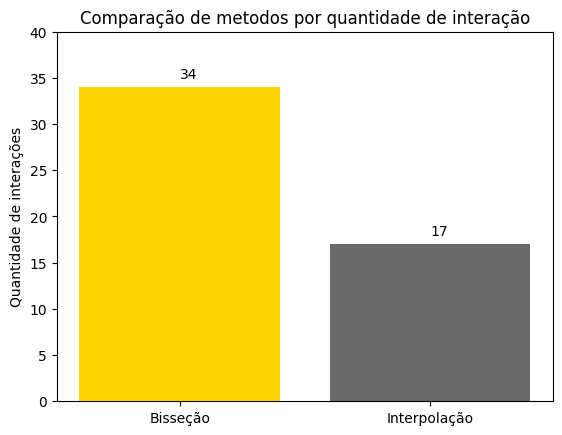

In [19]:
index = np.arange(2)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2],[interacoesFiBiss,interacoesFiInter],color = ['#FFD700','#696969'])

plt.text(2,18,str(interacoesFiInter))
plt.text(1,35,str(interacoesFiBiss))
plt.ylim(0,40)

plt.xticks(index+1, ("Bisseção", "Interpolação"))
plt.ylabel("Quantidade de interações")
plt.show()

In [20]:
#Segundo teste com a função f(x)
def f(x):
    return -0.5*x**2+2.5*x+4.5

interacoesFBiss = bissecao3(f,-2,0)[1]
interacoesFInter = interpolacao(f,-2,0)[1]

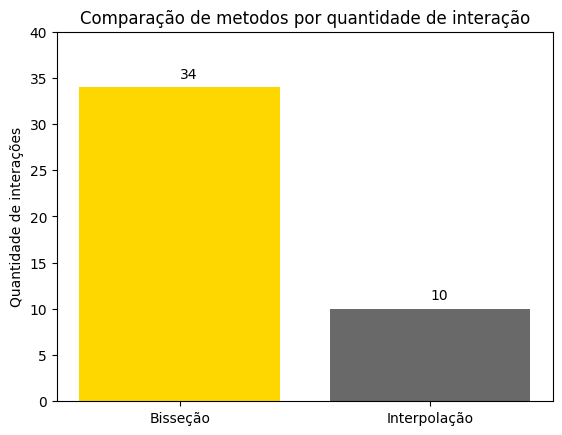

In [21]:
index = np.arange(2)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2],[interacoesFBiss,interacoesFInter],color = ['#FFD700','#696969'])


plt.text(2,11,str(interacoesFInter))
plt.text(1,35,str(interacoesFBiss))
plt.ylim(0,40)


plt.xticks(index+1, ("Bisseção", "Interpolação"))
plt.ylabel("Quantidade de interações")
plt.show()